In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn import metrics

In [ ]:
data= pd.read_csv('/content/Walmart.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
data.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,5/10/2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12/10/2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [ ]:
data.shape

(6435, 8)

In [ ]:
data.shape

(6435, 8)

In [ ]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
data['Date']=data['Date'].astype('datetime64')

<ipython-input-82-ba269b6df43a>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date']=data['Date'].astype('datetime64')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
data.duplicated().sum()

0

In [ ]:
nlist=data.columns

In [ ]:
data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

### Visualization


In [ ]:
nlist=data.columns
nlist

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

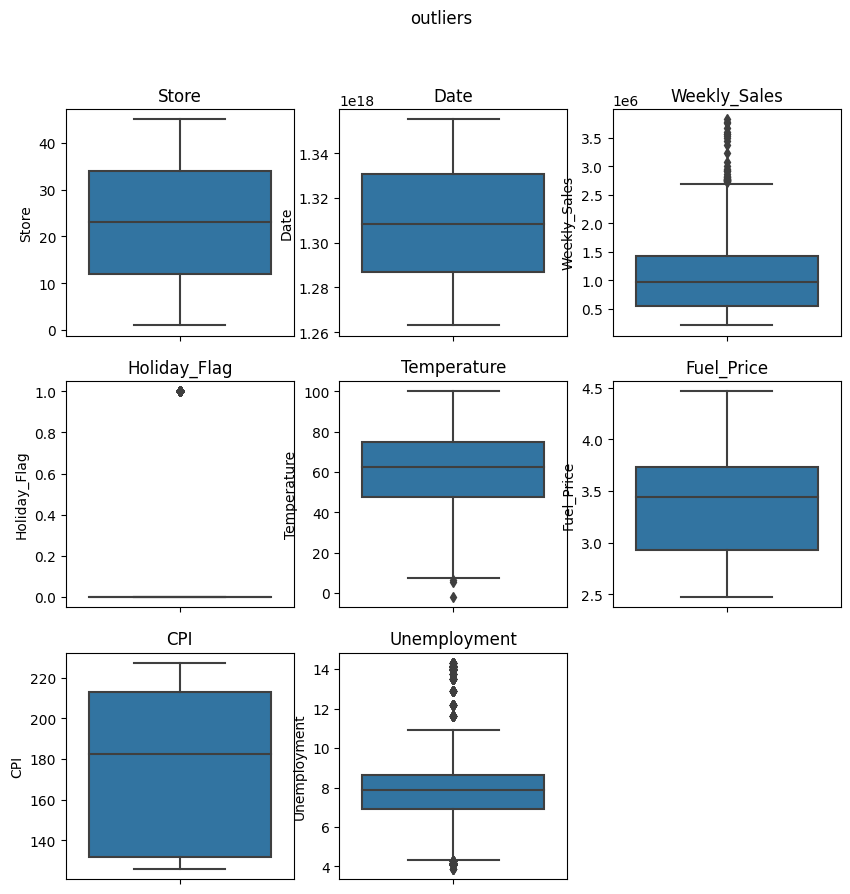

In [ ]:

k = 1
plt.figure(figsize=(10, 10))
plt.suptitle('outliers')

for i in nlist:
    plt.subplot(3, 3, k)
    sns.boxplot(y=pd.to_numeric(data[i], errors='coerce'))  # Convert the column to numeric
    plt.title(i)
    k += 1

plt.show()


<Axes: >

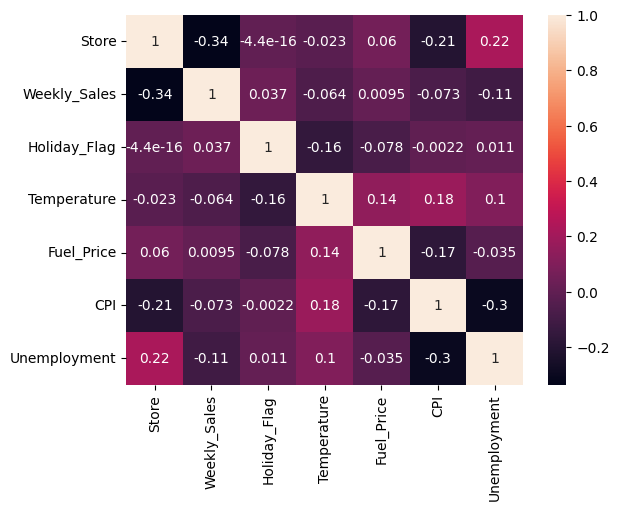

In [ ]:
df = pd.DataFrame(data=data, columns =['Store','Weekly_Sales', 'Holiday_Flag', 'Temperature','Fuel_Price', 'CPI', 'Unemployment'])
corr = df.corr()
sns.heatmap(corr, annot = True)

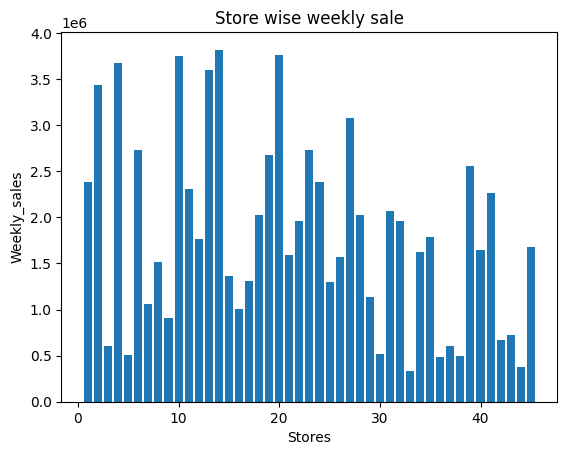

In [ ]:
plt.bar(data['Store'],data['Weekly_Sales'])
plt.xlabel('Stores')
plt.ylabel('Weekly_sales')
plt.title('Store wise weekly sale')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

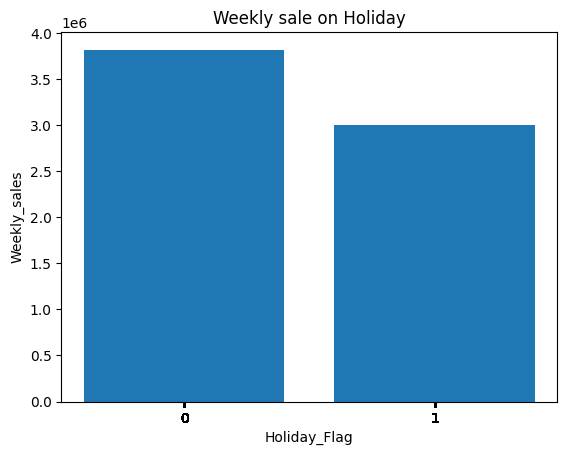

In [ ]:
plt.bar(data['Holiday_Flag'],data['Weekly_Sales'])
plt.xlabel('Holiday_Flag')
plt.ylabel('Weekly_sales')
plt.title('Weekly sale on Holiday')
ax1 = plt.subplot()
ax1.set_xticks(data['Holiday_Flag'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

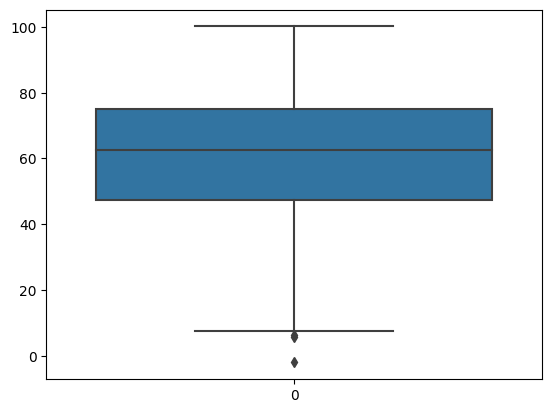

In [ ]:
sns.boxplot(data['Temperature'])
plt.show

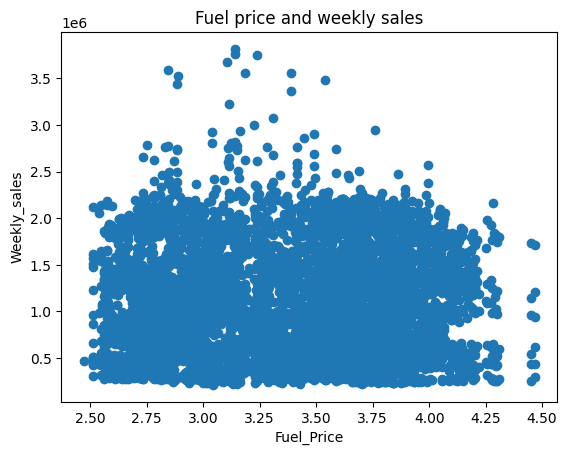

In [ ]:
plt.scatter(data['Fuel_Price'],data['Weekly_Sales'])
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly_sales')
plt.title('Fuel price and weekly sales')
plt.show()

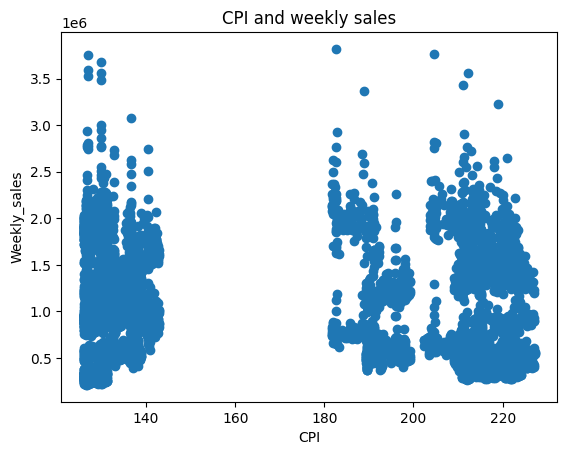

In [ ]:
plt.scatter(data['CPI'],data['Weekly_Sales'])
plt.xlabel('CPI')
plt.ylabel('Weekly_sales')
plt.title('CPI and weekly sales')
plt.show()

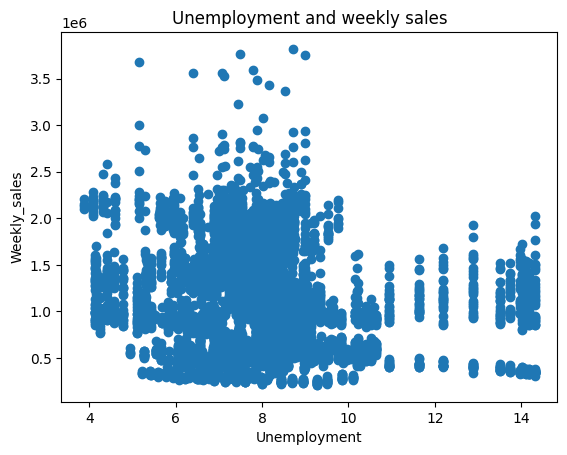

In [ ]:
plt.scatter(data['Unemployment' ],data['Weekly_Sales'])
plt.xlabel('Unemployment')
plt.ylabel('Weekly_sales')
plt.title('Unemployment and weekly sales')
plt.show()

<ipython-input-95-0e5d109d2911>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Temperature'])


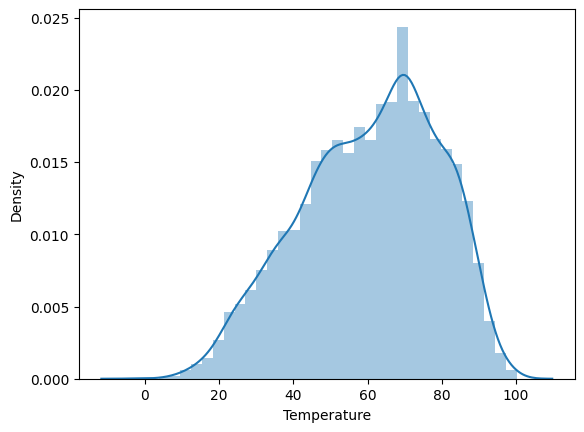

In [ ]:
sns.distplot(data['Temperature'])
plt.show()

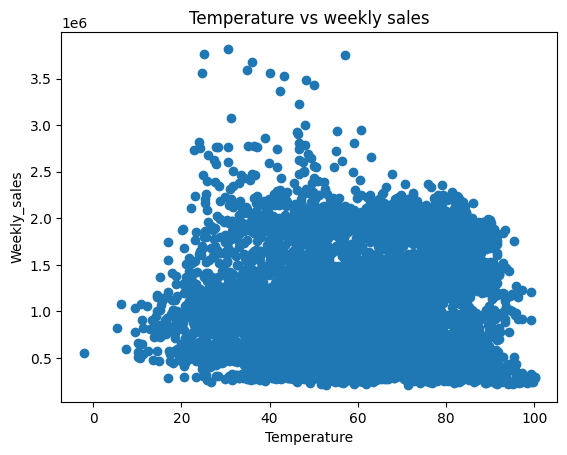

In [ ]:
#plt.hist(data['Unemployment'],data['Weekly_Sales'])
plt.scatter(data['Temperature'], data['Weekly_Sales'],)
plt.xlabel('Temperature')
plt.ylabel('Weekly_sales')
plt.title('Temperature vs weekly sales')
plt.show()

<ipython-input-97-b13fbbd5777f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weekly_Sales'])


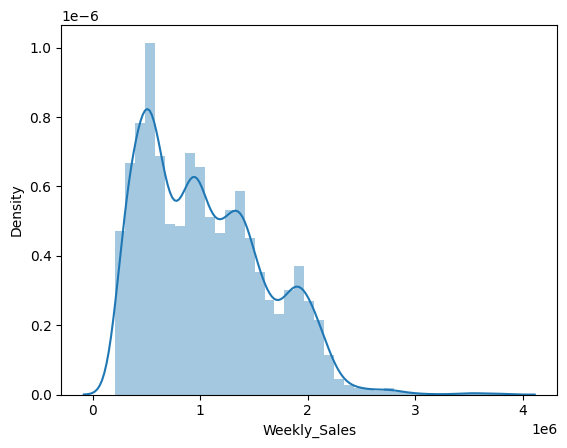

In [ ]:
sns.distplot(data['Weekly_Sales'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

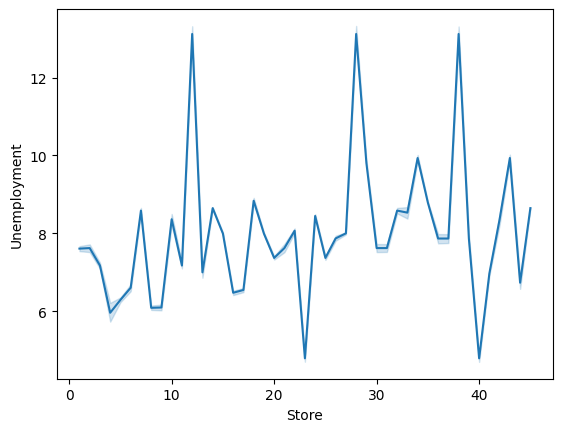

In [ ]:
sns.lineplot(x=data['Store'],y=data['Unemployment'])
plt.show

In [ ]:
#by giving data_1/2/3/4...45 we can access data of 45 stores by using this for loop
for i, g in data.groupby('Store'):
    globals()['data_' + str(i)] =  g
data_1
#data of store 1(sale,date)
store_1=data_1[['Date','Weekly_Sales']]
store_1.head()


,Date,Weekly_Sales
0,2010-05-02,1643690.90
1,2010-12-02,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-05-03,1554806.68


In [ ]:
store_1 = store_1.set_index(['Date'])
store_1.head()

,Weekly_Sales
Date,
2010-05-02,1643690.90
2010-12-02,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-05-03,1554806.68


In [ ]:
store_1=store_1.astype('int64')

<function matplotlib.pyplot.show(close=None, block=None)>

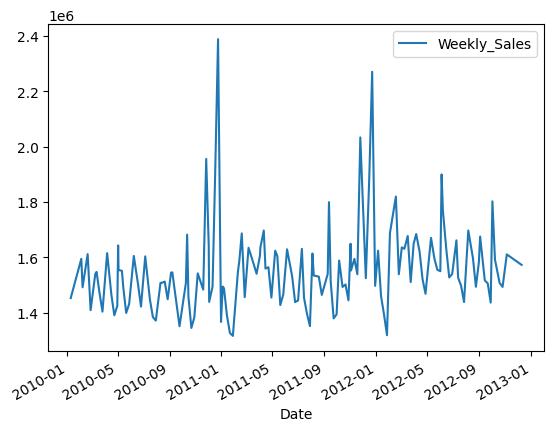

In [ ]:
store_1.plot()
plt.show

In [ ]:
#f- format while print statement is used

from statsmodels.tsa.stattools import adfuller

#ADF Test - if the p-value < 0.05 - Data is stationary
result = adfuller(store_1)

print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

#print(f'Result: The series is {"not " if result[1]>0.05 else ""}stationary')

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

ADF Statistic,-5.102187191857659
p-value=1.3877721055279061e-05
n_lags,4
series is stationary


In [ ]:
train1=store_1.iloc[:112]['Weekly_Sales']
test1=store_1.iloc[112:]['Weekly_Sales']

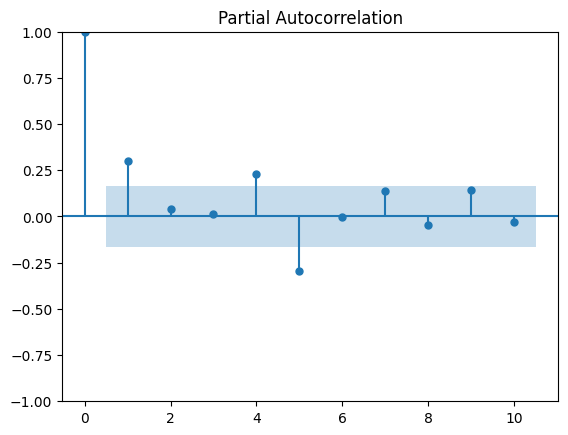

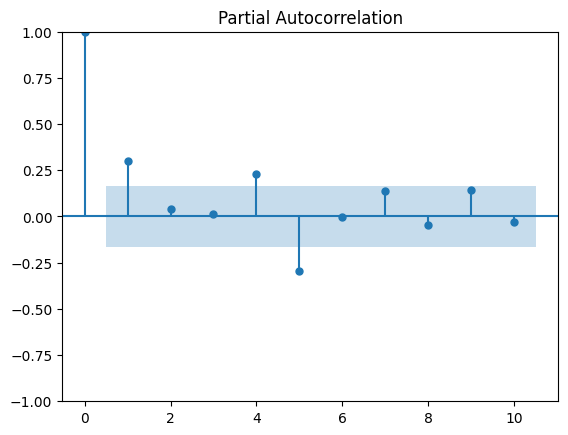

In [ ]:
plot_pacf(store_1, lags=10)

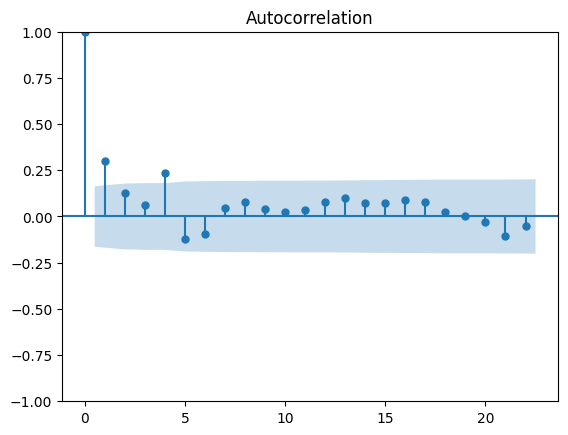

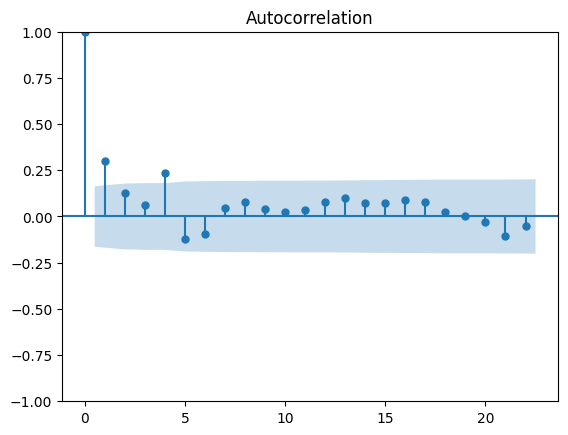

In [ ]:
plot_acf(store_1)

In [ ]:
model = ARIMA(train1,order=(4,0,4)) #(p,d,q)
model_fit=model.fit()
start=len(train1)
end=len(train1)+len(test1)-1
pred=model_fit.predict(start=len(train1), end=len(train1)+len(test1)-1,dynamic=True)
pred.index=store_1.index[start:end+1]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

<Axes: xlabel='Date'>

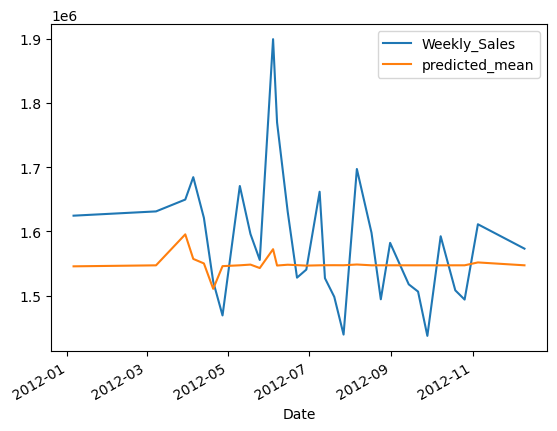

In [ ]:
test1.plot(legend=True)
pred.plot(legend=True)

In [ ]:
model_s=SARIMAX(train1,order=(0,1,0),seasonal_order=(0,1,0,52))
model_s=model_s.fit()
start=len(train1)
end=len(train1)+len(test1)-1
pred_s=model_s.predict(start=len(train1), end=len(train1)+len(test1)-1,dynamic=True)
pred_s.index=store_1.index[start:end+1]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

<Axes: xlabel='Date'>

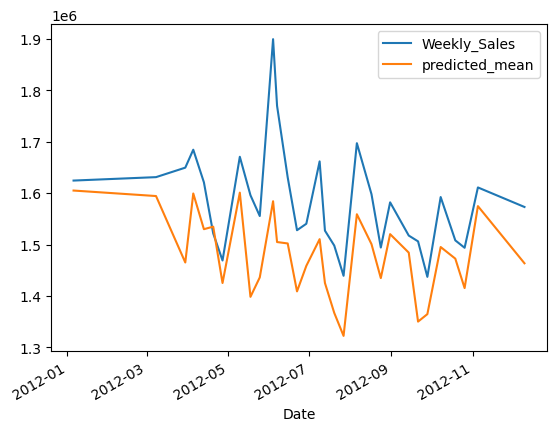

In [ ]:
test1.plot(legend=True)
pred_s.plot(legend=True)

In [ ]:
forecast = model_s.forecast(steps=52) #1 years

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
store_1 = store_1.reset_index('Date')
store_1 = store_1.drop(['Date'],axis=1)

<Axes: >

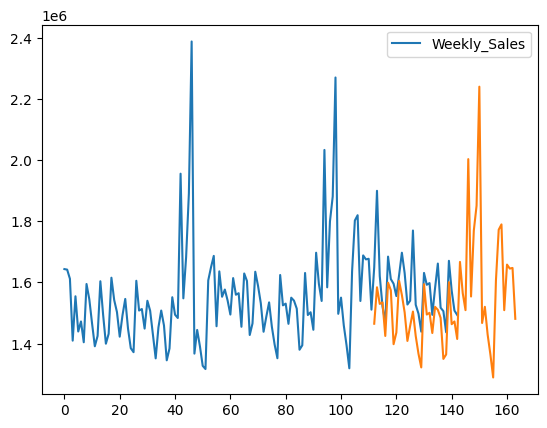

In [ ]:
store_1.plot()
forecast.plot()

In [ ]:
'''#Itertools


## How to find the ideal values for p,d,q:

import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination)) #total combinations of p,d,q

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        #model = sarima(train, order=pdq).fit()
        model = SARIMAX(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])
results.sort_values("RMSE") #Least RMSE score are best hyperparamterer for (p,d,q) values
#results'''

'#Itertools\n\n\n## How to find the ideal values for p,d,q:\n\nimport itertools\n\np = range(0,8)\nq = range(0,8)\nd = range(0,2)\n\npdq_combination = list(itertools.product(p,d,q))\npdq_combination\n\n\nprint(len(pdq_combination)) #total combinations of p,d,q\n\nfrom sklearn.metrics import *\nrmse = []\norder1 = []\n\nfor pdq in pdq_combination:\n        #model = sarima(train, order=pdq).fit()\n        model = SARIMAX(train,order=pdq)\n        model_fit=model.fit()\n        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)\n        error = np.sqrt(mean_squared_error(test, pred))\n        order1.append(pdq)\n        rmse.append(error)\n\n\nresults = pd.DataFrame(index=order1, data=rmse, columns=[\'RMSE\'])\nresults.sort_values("RMSE") #Least RMSE score are best hyperparamterer for (p,d,q) values\n#results'

# **Store 2**

In [ ]:
store_2=data_2[['Date','Weekly_Sales']]
store_2

,Date,Weekly_Sales
143,2010-05-02,2136989.46
144,2010-12-02,2137809.50
145,2010-02-19,2124451.54
146,2010-02-26,1865097.27
147,2010-05-03,1991013.13
...,...,...
281,2012-09-28,1746470.56
282,2012-05-10,1998321.04
283,2012-12-10,1900745.13
284,2012-10-19,1847990.41


In [ ]:
store_2=store_2.set_index(['Date'])

<Axes: xlabel='Date'>

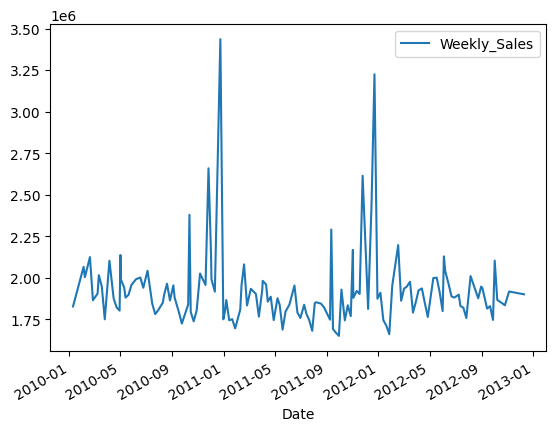

In [ ]:
store_2.plot()

In [ ]:
#f- format while print statement is used

from statsmodels.tsa.stattools import adfuller

#ADF Test - if the p-value < 0.05 - Data is stationary
result = adfuller(store_2)

print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

#print(f'Result: The series is {"not " if result[1]>0.05 else ""}stationary')

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

ADF Statistic,-3.7088625726189153
p-value=0.003990207089066268
n_lags,6
series is stationary


In [ ]:
train2=store_2.iloc[:112]['Weekly_Sales']
test2=store_2.iloc[112:]['Weekly_Sales']

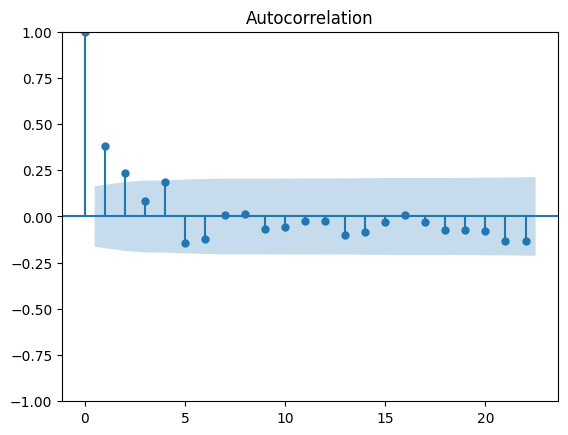

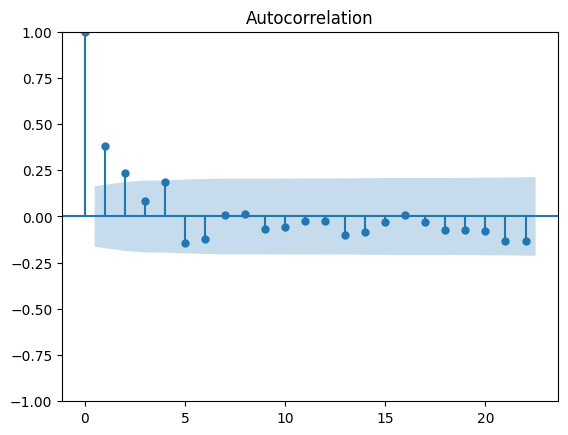

In [ ]:
plot_acf(store_2)

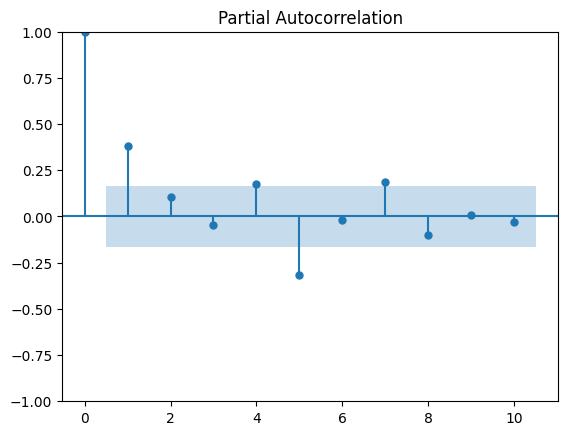

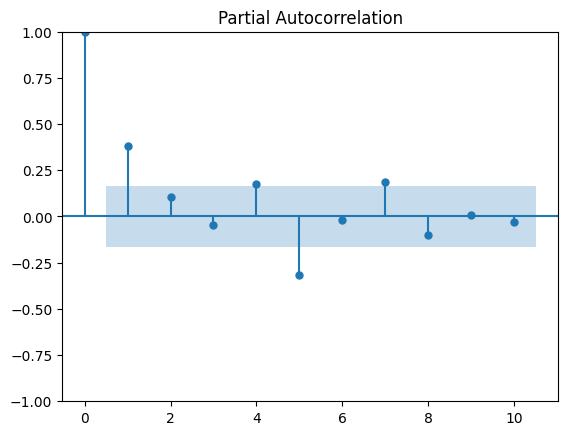

In [ ]:
plot_pacf(store_2, lags=10)

In [ ]:
model_s=SARIMAX(train2,order=(0,1,1),seasonal_order=(0,1,1,52))
model_s=model_s.fit()
start=len(train2)
end=len(train2)+len(test2)-1
pred_s=model_s.predict(start=len(train2), end=len(train2)+len(test2)-1,dynamic=True)
pred_s.index=store_2.index[start:end+1]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [ ]:
forecast = model_s.forecast(steps=52) #1 years

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
store_2 = store_2.reset_index('Date')
store_2 = store_2.drop(['Date'],axis=1)

<Axes: >

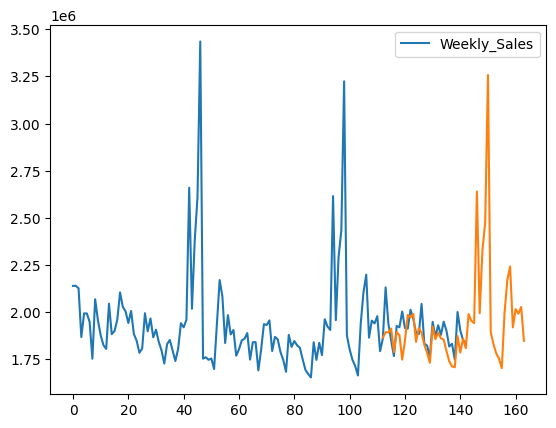

In [ ]:
store_2.plot()
forecast.plot()

# **Store 3**

In [ ]:
store_3=data_3[['Date','Weekly_Sales']]
store_3

,Date,Weekly_Sales
286,2010-05-02,461622.22
287,2010-12-02,420728.96
288,2010-02-19,421642.19
289,2010-02-26,407204.86
290,2010-05-03,415202.04
...,...,...
424,2012-09-28,389813.02
425,2012-05-10,443557.65
426,2012-12-10,410804.39
427,2012-10-19,424513.08


In [ ]:
store_3=store_3.set_index(['Date'])
#f- format while print statement is used

from statsmodels.tsa.stattools import adfuller

#ADF Test - if the p-value < 0.05 - Data is stationary
result = adfuller(store_3)

print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

#print(f'Result: The series is {"not " if result[1]>0.05 else ""}stationary')

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")


ADF Statistic,-2.963867745511323
p-value=0.03840926179831256
n_lags,6
series is stationary


In [ ]:
train3=store_3.iloc[:112]['Weekly_Sales']
test3=store_3.iloc[112:]['Weekly_Sales']

In [ ]:
model_s=SARIMAX(train3,order=(0,1,1),seasonal_order=(0,1,1,52))
model_s=model_s.fit()
start=len(train3)
end=len(train3)+len(test3)-1
pred_s=model_s.predict(start=len(train3), end=len(train3)+len(test3)-1,dynamic=True)
pred_s.index=store_3.index[start:end+1]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [ ]:
forecast = model_s.forecast(steps=52) #1 years

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
store_3 = store_3.reset_index('Date')
store_3 = store_3.drop(['Date'],axis=1)

<Axes: >

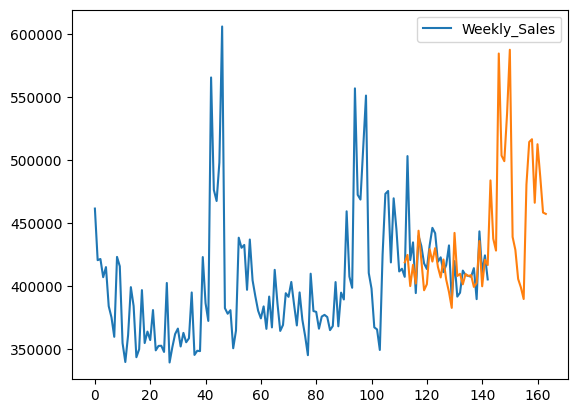

In [ ]:
store_3.plot()
forecast.plot()

#store_4

In [ ]:
store_4=data_4[['Date','Weekly_Sales']]
store_4

,Date,Weekly_Sales
429,2010-05-02,2135143.87
430,2010-12-02,2188307.39
431,2010-02-19,2049860.26
432,2010-02-26,1925728.84
433,2010-05-03,1971057.44
...,...,...
567,2012-09-28,2027620.23
568,2012-05-10,2209835.43
569,2012-12-10,2133026.07
570,2012-10-19,2097266.85


In [ ]:
store_4=store_4.set_index(['Date'])
#f- format while print statement is used

from statsmodels.tsa.stattools import adfuller

#ADF Test - if the p-value < 0.05 - Data is stationary
result = adfuller(store_4)

print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

#print(f'Result: The series is {"not " if result[1]>0.05 else ""}stationary')

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")


ADF Statistic,-2.8793819840147123
p-value=0.04779866223669836
n_lags,6
series is stationary


In [ ]:
train4=store_4.iloc[:112]['Weekly_Sales']
test4=store_4.iloc[112:]['Weekly_Sales']

In [ ]:
model_s=SARIMAX(train4,order=(0,1,1),seasonal_order=(0,1,1,52))
model_s=model_s.fit()
start=len(train4)
end=len(train4)+len(test4)-1
pred_s=model_s.predict(start=len(train4), end=len(train4)+len(test4)-1,dynamic=True)
pred_s.index=store_4.index[start:end+1]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [ ]:
forecast = model_s.forecast(steps=52) #1 years

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
store_4 = store_4.reset_index('Date')
store_4 = store_4.drop(['Date'],axis=1)

<Axes: >

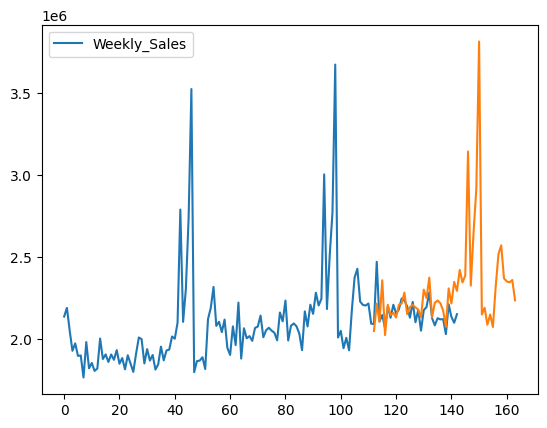

In [ ]:
store_4.plot()
forecast.plot()

#Store 5

In [ ]:
store_5=data_5[['Date','Weekly_Sales']]
store_5

,Date,Weekly_Sales
572,2010-05-02,317173.10
573,2010-12-02,311825.70
574,2010-02-19,303447.57
575,2010-02-26,270281.63
576,2010-05-03,288855.71
...,...,...
710,2012-09-28,310141.68
711,2012-05-10,343048.29
712,2012-12-10,325345.41
713,2012-10-19,313358.15


In [ ]:
store_5=store_5.set_index(['Date'])
#f- format while print statement is used

from statsmodels.tsa.stattools import adfuller

#ADF Test - if the p-value < 0.05 - Data is stationary
result = adfuller(store_5)

print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

#print(f'Result: The series is {"not " if result[1]>0.05 else ""}stationary')

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")


ADF Statistic,-4.310974424060915
p-value=0.00042517056141923293
n_lags,4
series is stationary


In [ ]:
train5=store_5.iloc[:112]['Weekly_Sales']
test5=store_5.iloc[112:]['Weekly_Sales']

In [ ]:
model_s=SARIMAX(train5,order=(0,1,1),seasonal_order=(0,1,1,52))
model_s=model_s.fit()
start=len(train5)
end=len(train5)+len(test5)-1
pred_s=model_s.predict(start=len(train5), end=len(train5)+len(test5)-1,dynamic=True)
pred_s.index=store_5.index[start:end+1]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [ ]:
forecast = model_s.forecast(steps=52) #1 years

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
store_5 = store_5.reset_index('Date')
store_5 = store_5.drop(['Date'],axis=1)

<Axes: >

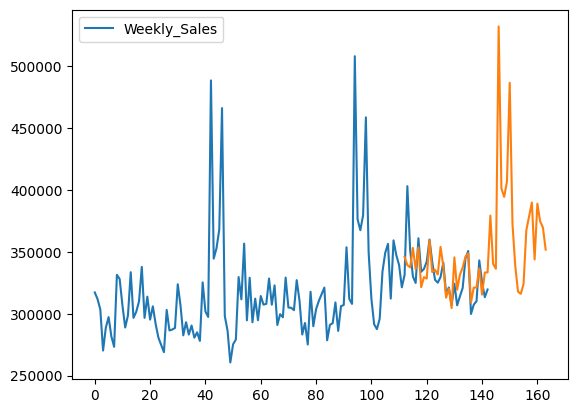

In [ ]:
store_5.plot()
forecast.plot()